In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("C:\\Users\\NAMAN\\Downloads\\Titanic-Dataset.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\NAMAN\AppData\Local\Temp\ipykernel_15060\1313650850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\NAMAN\AppData\Local\Temp\ipykernel_15060\1313650850.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [18]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [19]:
num_features = [features for features in df.columns if df[features].dtype != 'O']
print('we have : {} numeric feature and those are : {}'.format(len(num_features),num_features))
cat_feartures = [features for features in df.columns if df[features].dtype == 'O']
print('we have : {} categorical feature and those are : {}'.format(len(cat_feartures),cat_feartures))

we have : 7 numeric feature and those are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
we have : 4 categorical feature and those are : ['Name', 'Sex', 'Ticket', 'Embarked']


In [20]:
df_num = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Name', 'Sex', 'Ticket', 'Embarked']]

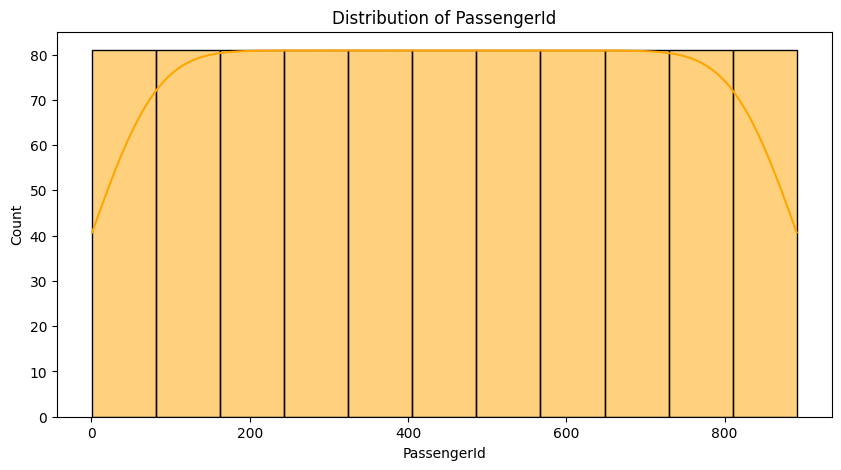

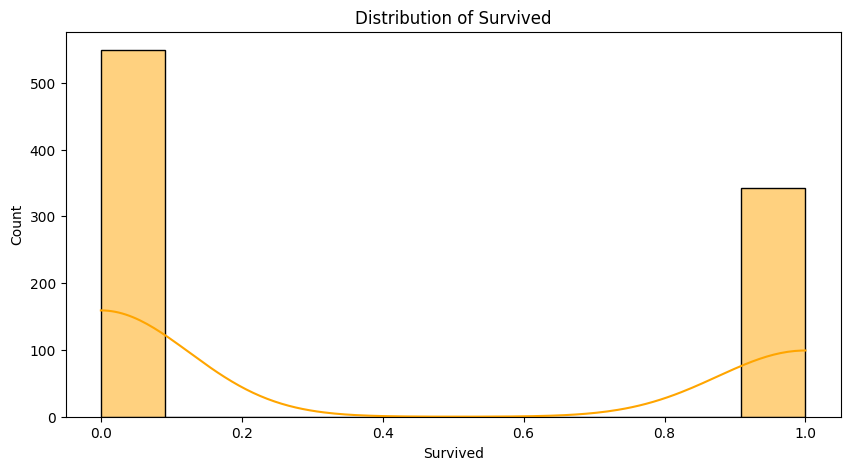

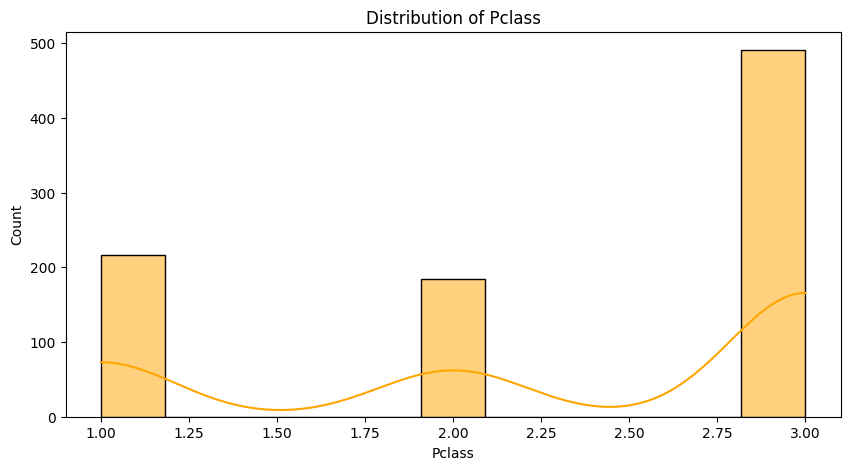

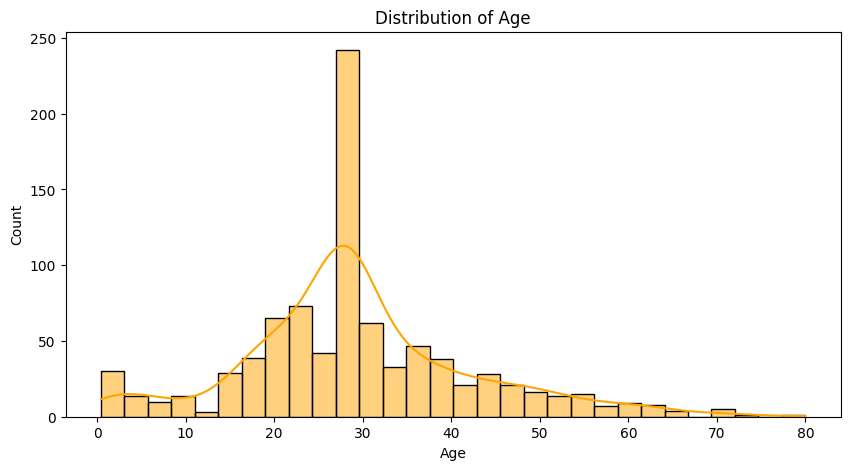

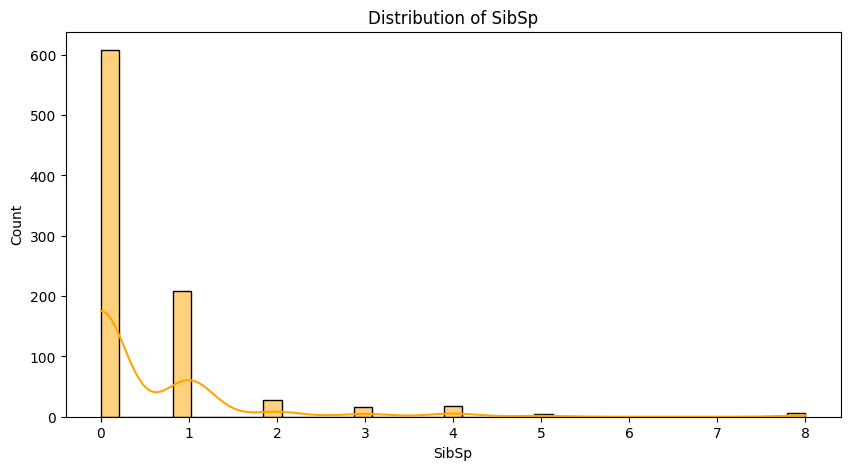

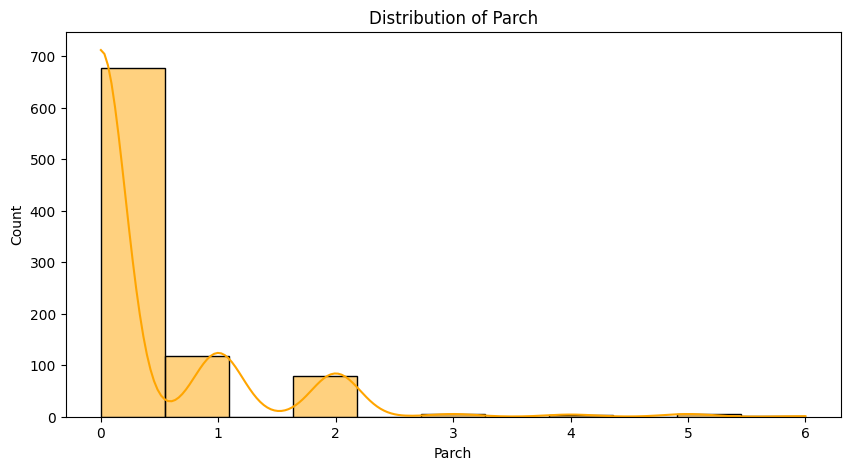

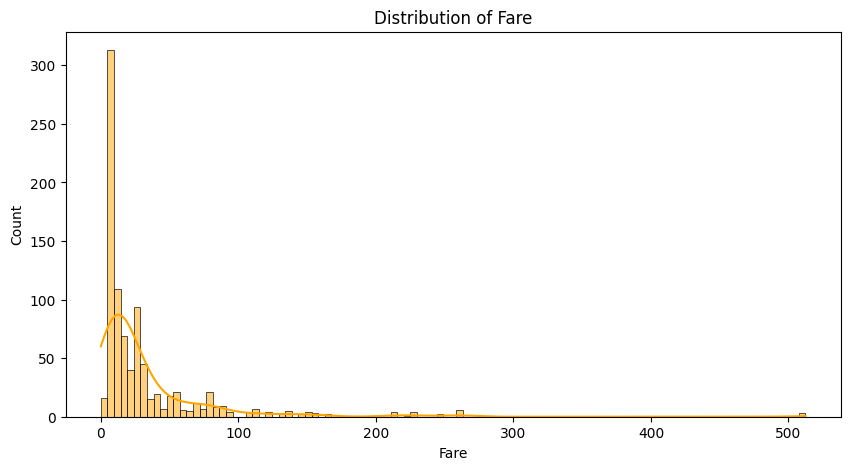

In [23]:
for i in df_num.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df_num[i],color='orange',kde=True) 
    plt.title(f'Distribution of {i}')
    plt.show()

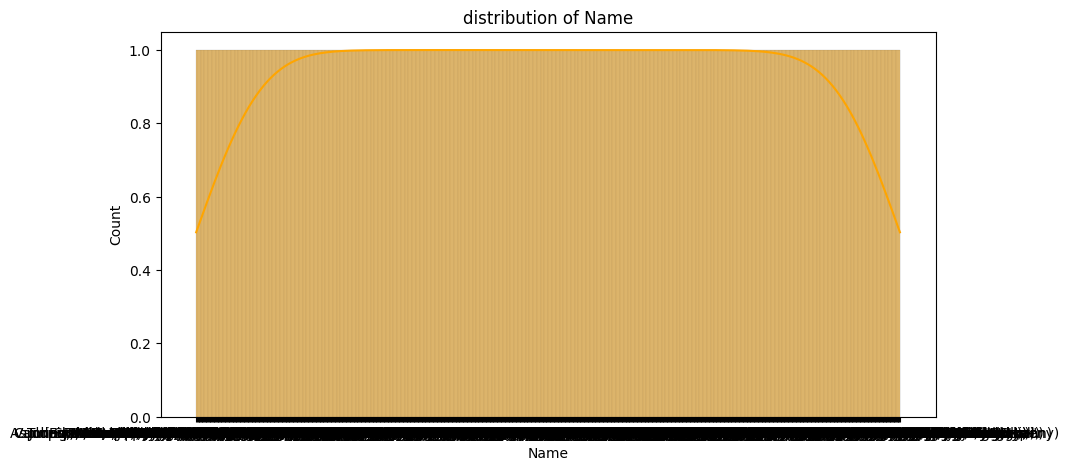

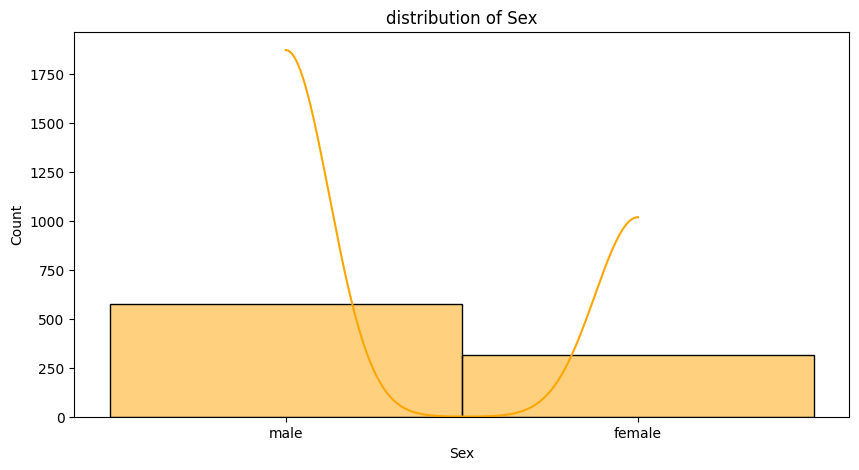

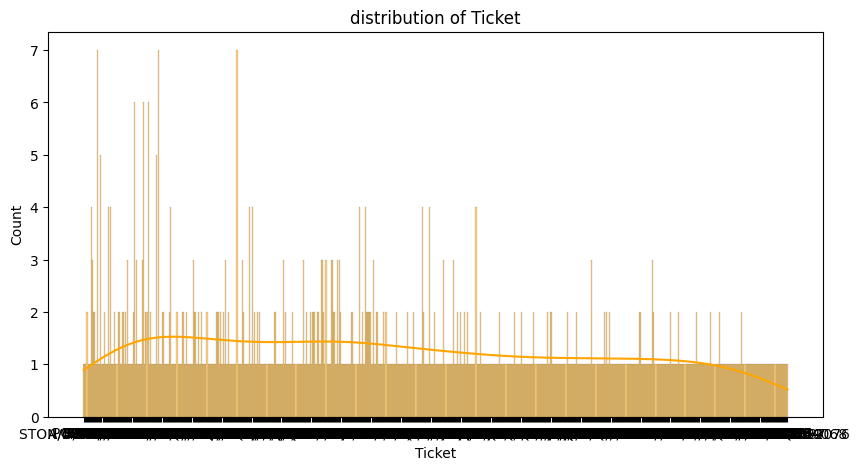

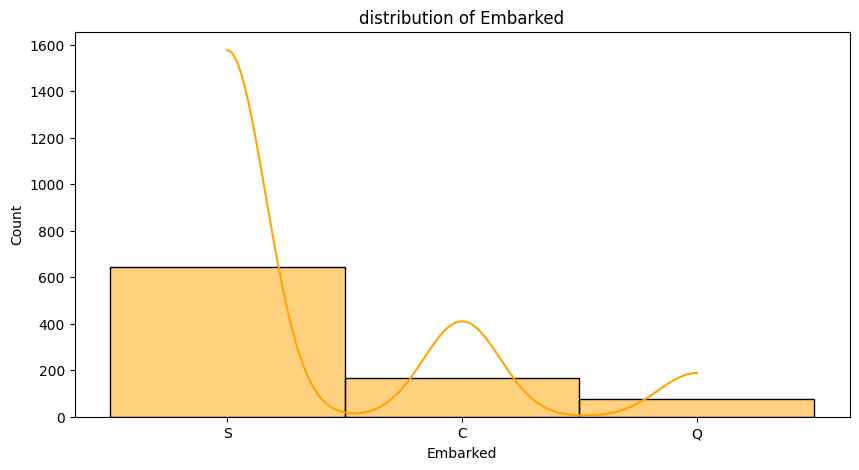

In [11]:
for i in df_cat.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df_cat[i],color='orange',kde=True)
    plt.title(f'distribution of {i}')
    plt.show()

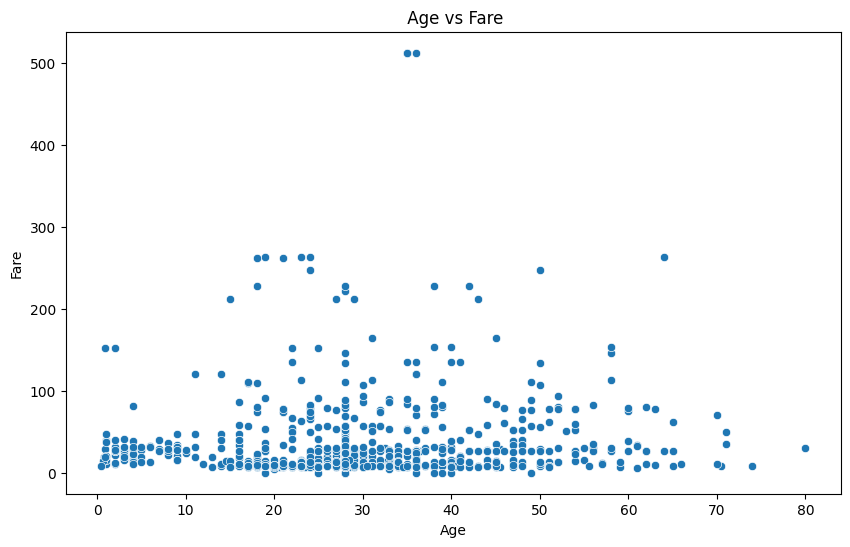

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title(' Age vs Fare')
plt.show()

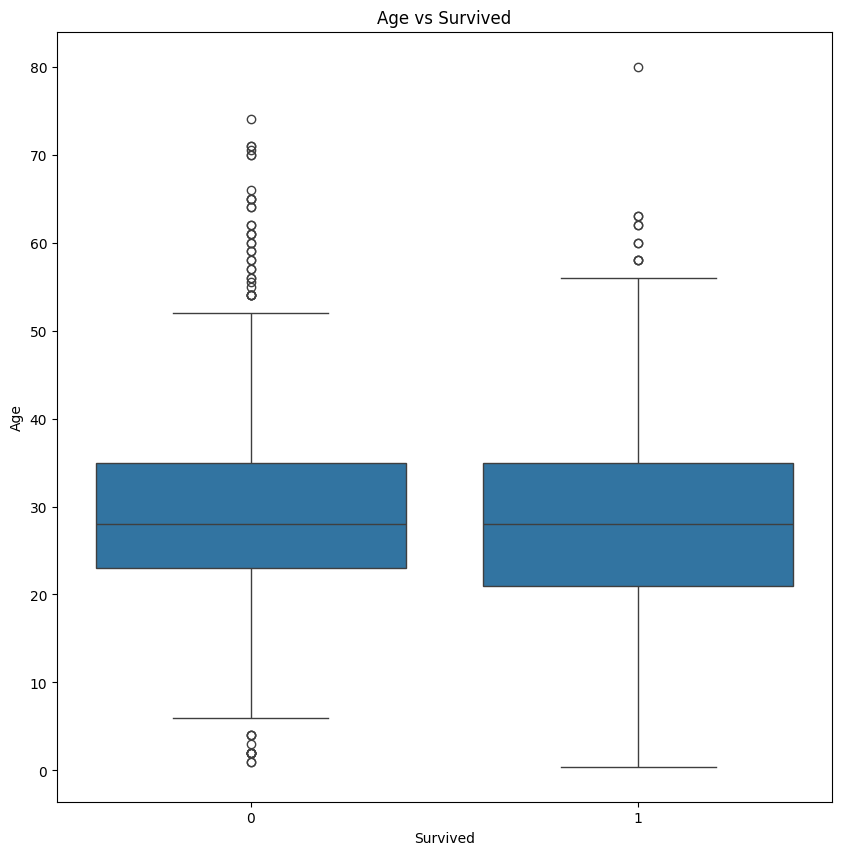

In [91]:
plt.figure(figsize=(10,10))
sns.boxplot(df,x='Survived',y='Age')
plt.title('Age vs Survived')
plt.show()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


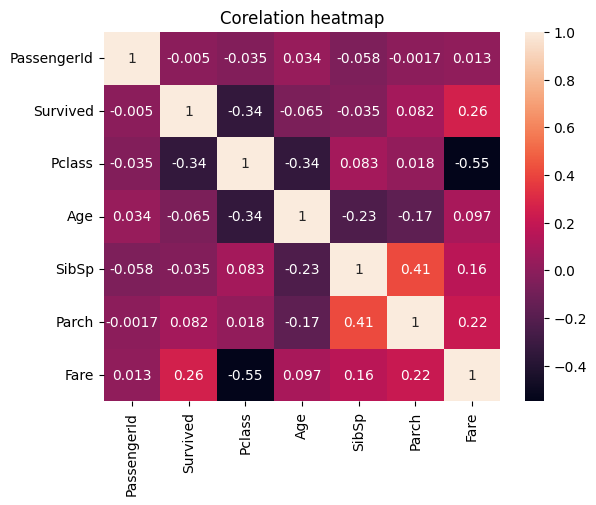

In [71]:
print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True)
plt.title('Corelation heatmap')
plt.show()

In [32]:
pd.pivot_table(df,index='Survived',values=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.028233,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.291433,48.395408,0.464912,444.368421,1.950292,0.473684


In [33]:
df['Sex'] = df['Sex'].replace({'female':1,'male':0})
df= pd.get_dummies(df,columns=['Embarked'],drop_first=True)

C:\Users\NAMAN\AppData\Local\Temp\ipykernel_15060\4053141686.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'female':1,'male':0})


In [34]:
print(df.describe())
df.describe().columns

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [35]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name         Sex  \
count    891.000000  891.000000  891.000000                  891  891.000000   
unique          NaN         NaN         NaN                  891         NaN   
top             NaN         NaN         NaN  Dooley, Mr. Patrick         NaN   
freq            NaN         NaN         NaN                    1         NaN   
mean     446.000000    0.383838    2.308642                  NaN    0.352413   
std      257.353842    0.486592    0.836071                  NaN    0.477990   
min        1.000000    0.000000    1.000000                  NaN    0.000000   
25%      223.500000    0.000000    2.000000                  NaN    0.000000   
50%      446.000000    0.000000    3.000000                  NaN    0.000000   
75%      668.500000    1.000000    3.000000                  NaN    1.000000   
max      891.000000    1.000000    3.000000                  NaN    1.000000   

               Age       SibSp       Pa

In [36]:
df.drop(columns=['Name','PassengerId','Ticket'],inplace=True)

In [72]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


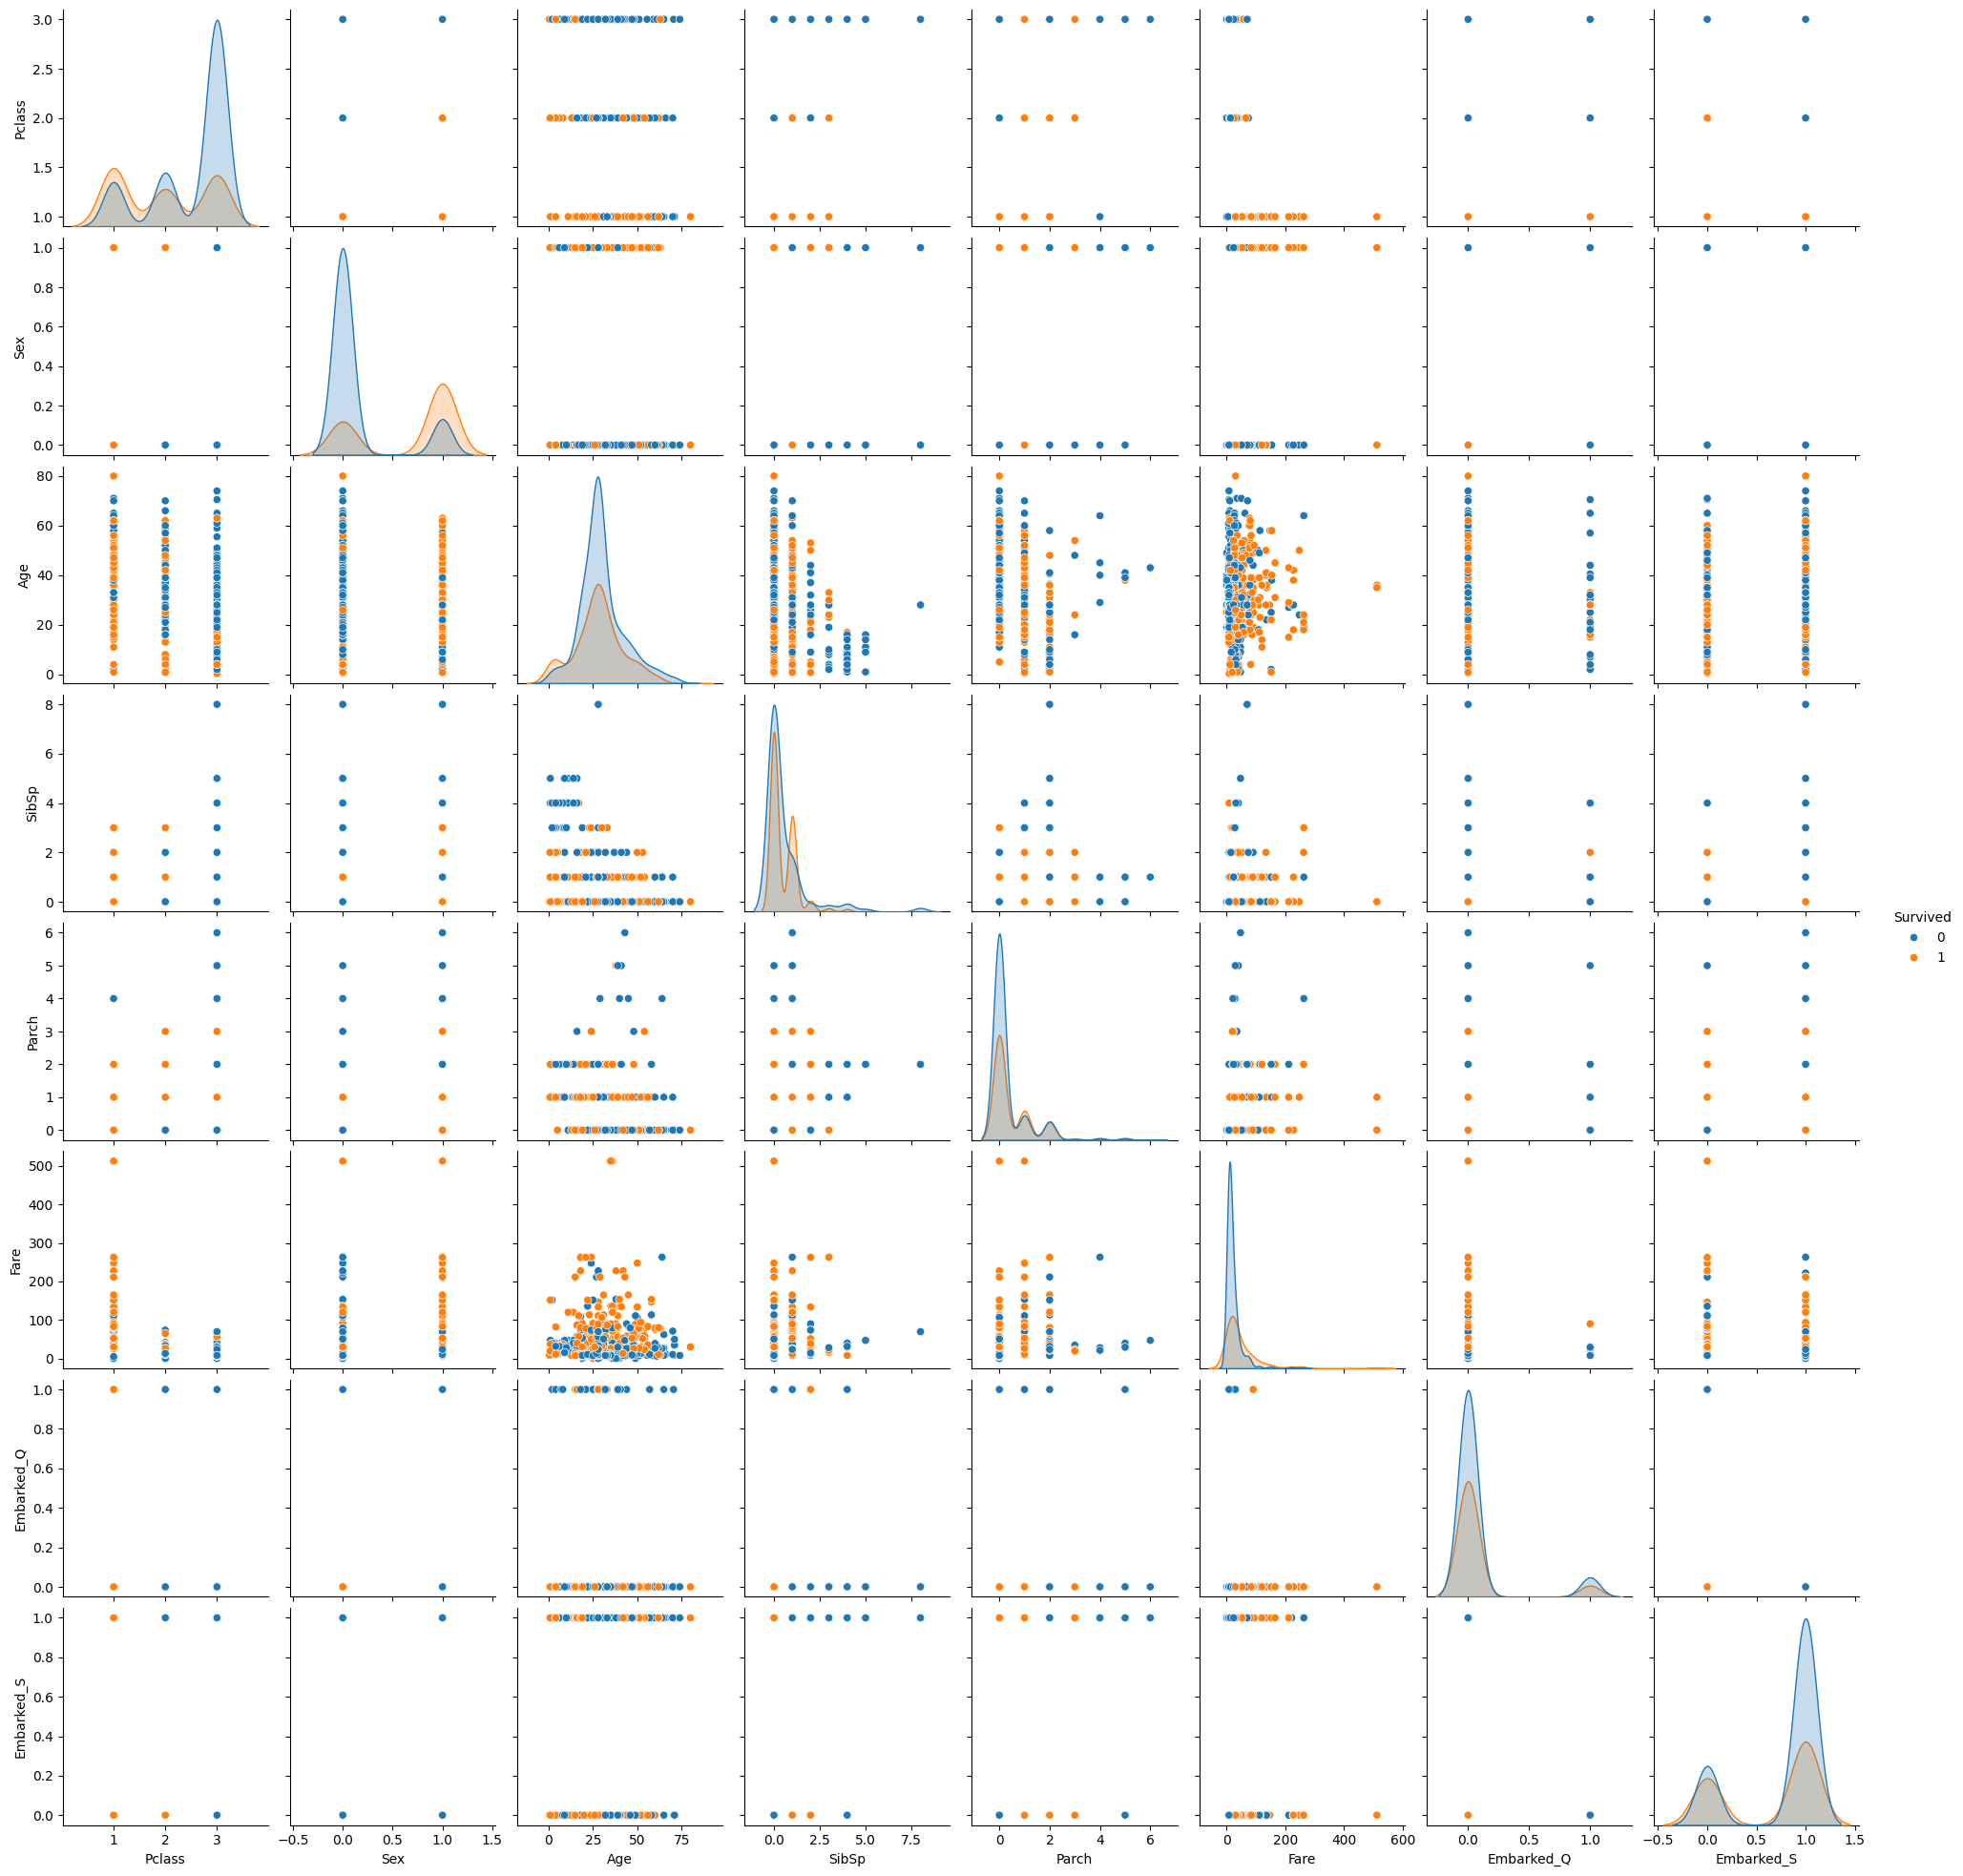

In [37]:
sns.pairplot(df, hue='Survived')
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [39]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'Decision tree' : DecisionTreeClassifier(),
    'KNeighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support vector' : SVC()
}

In [73]:
for name, model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'performance of the model {name} :')
    print('Accuracy :',accuracy_score(y_test,y_pred))
    print('cross validation score : ',cross_val_score(model,X_train_scaled,y_train,cv=10))
    print('Mean of cross validation : ',cross_val_score(model,X_train_scaled,y_train,cv=10).mean())
    print('classification report : ',classification_report(y_test,y_pred))
    print('-' * 53)

performance of the model LogisticRegression :
Accuracy : 0.8100558659217877
cross validation score :  [0.84722222 0.79166667 0.70422535 0.91549296 0.84507042 0.73239437
 0.76056338 0.71830986 0.73239437 0.91549296]
Mean of cross validation :  0.7962832550860719
classification report :                precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

-----------------------------------------------------
performance of the model Decision tree :
Accuracy : 0.7877094972067039
cross validation score :  [0.79166667 0.69444444 0.71830986 0.76056338 0.76056338 0.71830986
 0.73239437 0.73239437 0.76056338 0.71830986]
Mean of cross validation :  0.7570813771517998
classification report :                precision    recall  f1-score   supp